<a href="https://colab.research.google.com/github/PraveenaSL/PRAVEENASL/blob/main/log_reg8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data=pd.read_excel("/content/iris (2).xls")

Question 1

In [8]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Question 2 :Preprocessing :missing values ,outlier detection,encoding

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [12]:
data['SL']=data['SL'].fillna(data['SL'].median())
data['SW']=data['SW'].fillna(data['SW'].median())
data['PL']=data['PL'].fillna(data['PL'].median())

In [13]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [14]:
num_cols=['SL', 'SW', 'PL', 'PW', 'Classification']

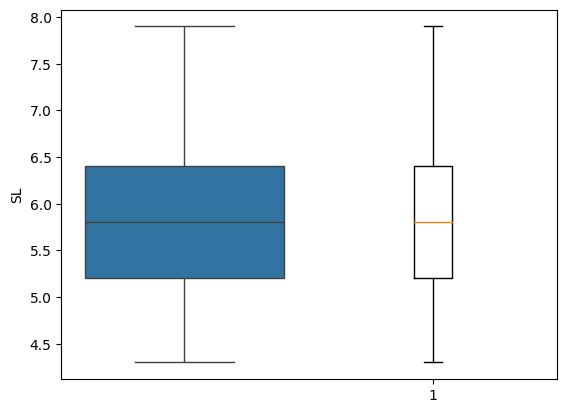

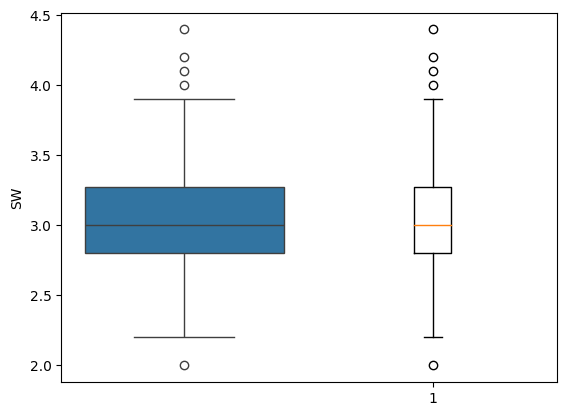

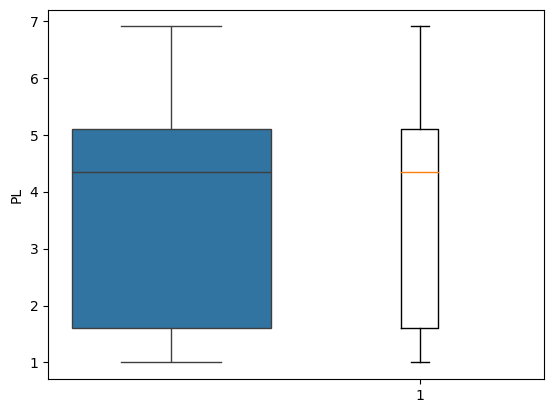

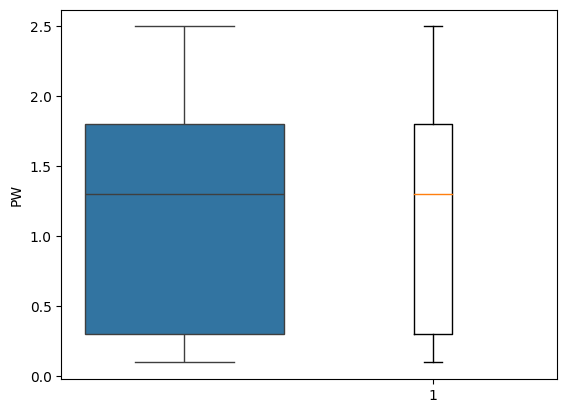

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

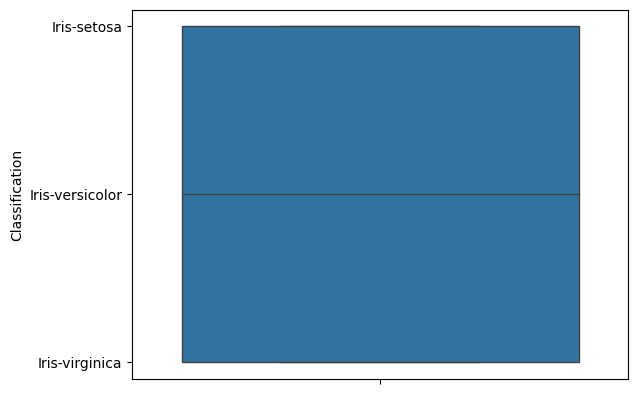

In [15]:
for i in num_cols:
  sns.boxplot(data[i])
  plt.boxplot(data[i])
  plt.show()

In [16]:
Q1=np.percentile(data['SW'],25,method='midpoint')
Q3=np.percentile(data['SW'],75,method='midpoint')
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [18]:
print('Q1 is ',Q1)
print('Q3 is ',Q3)
print('IQR is ',IQR)
print('lower_limit is ',lower_limit)
print('upper_limit is ',upper_limit)

Q1 is  2.8
Q3 is  3.25
IQR is  0.4500000000000002
lower_limit is  2.1249999999999996
upper_limit is  3.9250000000000003


In [19]:
outlier=[]
for x in data['SW']:
  if((x>upper_limit) or (x<lower_limit)):
    outlier.append(x)

In [20]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

Encoding

In [21]:
data.nunique()

SL                35
SW                23
PL                44
PW                22
Classification     3
dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
label_en=LabelEncoder

In [26]:
from sklearn.preprocessing import LabelEncoder

label_en = LabelEncoder()
data['Classification'] = label_en.fit_transform(data['Classification'])


In [27]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Standard scaler

In [28]:
data2=data.drop('Classification',axis=1)

In [30]:
data2.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,5.8,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data2)
print(scaled_data)


[[-9.34810564e-01  1.07627519e+00 -1.38079138e+00 -1.31297673e+00]
 [-1.18299036e+00 -1.12541293e-01 -1.38079138e+00 -1.31297673e+00]
 [-6.61812789e-02  3.62985299e-01 -1.43880783e+00 -1.31297673e+00]
 [-1.55526005e+00  1.25222003e-01 -1.32277494e+00 -1.31297673e+00]
 [-1.05890046e+00  1.31403848e+00 -1.38079138e+00 -1.31297673e+00]
 [-5.62540871e-01  2.02732837e+00 -1.20674205e+00 -1.05003079e+00]
 [-1.55526005e+00  8.38511891e-01 -1.38079138e+00 -1.18150376e+00]
 [-1.05890046e+00  8.38511891e-01 -1.32277494e+00 -1.31297673e+00]
 [-1.80343985e+00 -3.50304590e-01 -1.38079138e+00 -1.31297673e+00]
 [-1.18299036e+00  1.25222003e-01 -1.32277494e+00 -1.44444970e+00]
 [-5.62540871e-01 -1.12541293e-01 -1.32277494e+00 -1.31297673e+00]
 [-1.30708026e+00  8.38511891e-01 -1.26475849e+00 -1.31297673e+00]
 [-1.30708026e+00 -1.12541293e-01 -1.38079138e+00 -1.44444970e+00]
 [-1.92752975e+00 -1.12541293e-01 -1.55484071e+00 -1.44444970e+00]
 [-6.61812789e-02  2.26509167e+00 -1.49682427e+00 -1.31297673e

CLASSIFICATION LOGISTIC REGRESSION

In [45]:
data2=data.copy()

In [46]:
data2.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [47]:
from sklearn.preprocessing  import LabelEncoder
label_en=LabelEncoder()
data2['Classification']=label_en.fit_transform(data2['Classification'])

In [48]:
data2.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [50]:
data2.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [51]:
from sklearn.model_selection import train_test_split
x=data2.drop('Classification',axis=1)
y=data2['Classification']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [53]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
y_pred=log_reg.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

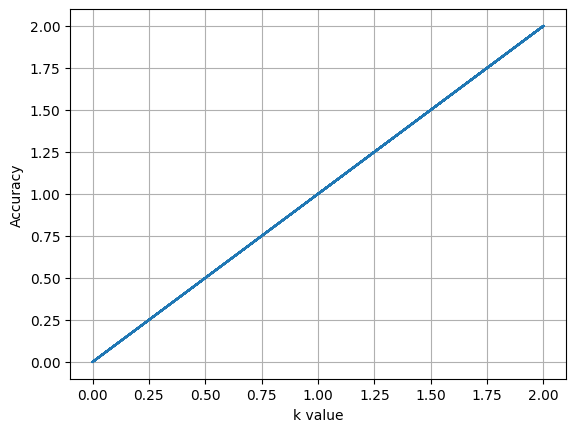

In [57]:
plt.plot(y_test,y_pred)
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.grid()

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)


recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVM

In [63]:
from sklearn.svm import SVC
svm_clf=SVC(kernel='linear')
svm_clf.fit(x_train,y_train)
y_pred=svm_clf.predict(x_test)

In [64]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
1.0


In [65]:
print('accuracy is',accuracy_score(y_test,y_pred))

accuracy is 1.0


DECISION TREE

In [66]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(criterion='entropy')
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [67]:
y_pred=dt_clf.predict(x_test)

In [68]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
1.0


RANDOM FOREST

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [71]:
y_pred=rf_clf.predict(x_test)

In [72]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
1.0
